In [1]:
import numpy as np
import mne # docu: https://mne.tools/stable/overview/index.html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PCIst import pci_st # https://github.com/renzocom/PCIst

import sys
sys.path.append('../')
from src import data

%matplotlib widget

In [2]:
%ls {data.path('external/annen_tms_eeg_ebrains')}

sub-S01/  sub-S03/  sub-S05/  sub-S07/  sub-S09/  sub-S11/
sub-S02/  sub-S04/  sub-S06/  sub-S08/  sub-S10/  sub-S12/


In [3]:
data_dir = data.path('external/annen_tms_eeg_ebrains')
subject = "sub-S01"
subject_dir = f"{data_dir}/{subject}/"

Reading /home/katterrina/fi_muni/0_diplomka/data/external/annen_tms_eeg_ebrains/sub-S01/sub-S01-epochs.fif ...
    Found the data of interest:
        t =    -100.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_73937/1045393615.py:1: RuntimeWarning: This filename (/home/katterrina/fi_muni/0_diplomka/data/external/annen_tms_eeg_ebrains/sub-S01/sub-S01-epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(subject_dir+subject+"-epochs.fif", preload=True, verbose=None)


Not setting metadata
267 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


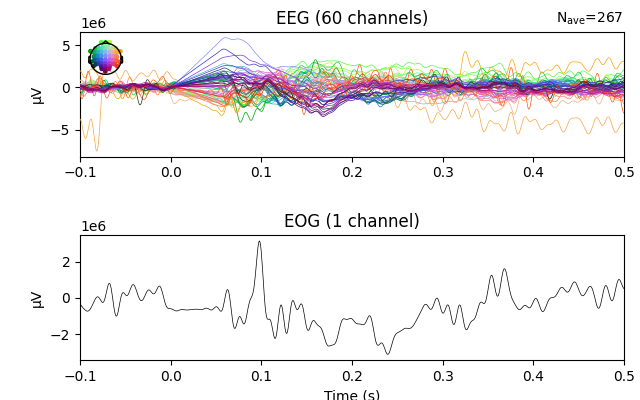

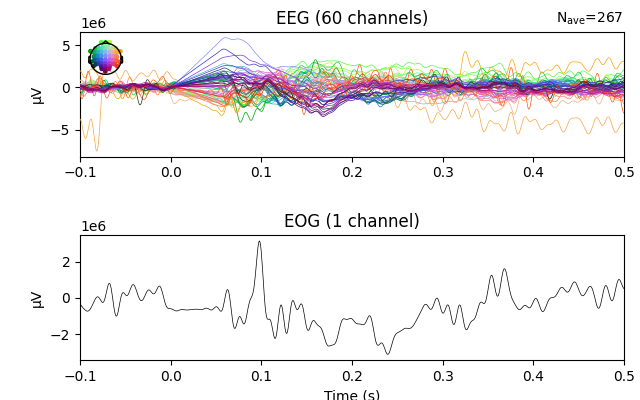

In [4]:
epochs = mne.read_epochs(subject_dir+subject+"-epochs.fif", preload=True, verbose=None)
epochs.average("all").plot();
plt.show();

In [5]:
epochs_data = epochs.get_data() # (n_epochs, n_channels, n_times)
epochs_data_averaged = np.mean(epochs_data,axis=0)

array([-0.1       , -0.09931034, -0.09862069, -0.09793103, -0.09724138,
       -0.09655172, -0.09586207, -0.09517241, -0.09448276, -0.0937931 ,
       -0.09310345, -0.09241379, -0.09172414, -0.09103448, -0.09034483,
       -0.08965517, -0.08896552, -0.08827586, -0.08758621, -0.08689655,
       -0.0862069 , -0.08551724, -0.08482759, -0.08413793, -0.08344828,
       -0.08275862, -0.08206897, -0.08137931, -0.08068966, -0.08      ,
       -0.07931034, -0.07862069, -0.07793103, -0.07724138, -0.07655172,
       -0.07586207, -0.07517241, -0.07448276, -0.0737931 , -0.07310345,
       -0.07241379, -0.07172414, -0.07103448, -0.07034483, -0.06965517,
       -0.06896552, -0.06827586, -0.06758621, -0.06689655, -0.0662069 ,
       -0.06551724, -0.06482759, -0.06413793, -0.06344828, -0.06275862,
       -0.06206897, -0.06137931, -0.06068966, -0.06      , -0.05931034,
       -0.05862069, -0.05793103, -0.05724138, -0.05655172, -0.05586207,
       -0.05517241, -0.05448276, -0.0537931 , -0.05310345, -0.05

10: 66.129
15: 66.835
20: 69.492
25: 68.993
30: 70.398
35: 70.364
40: 70.822
45: 71.258
50: 71.309
55: 71.855
60: 71.141
65: 71.681
70: 71.586
75: 71.786
80: 71.179


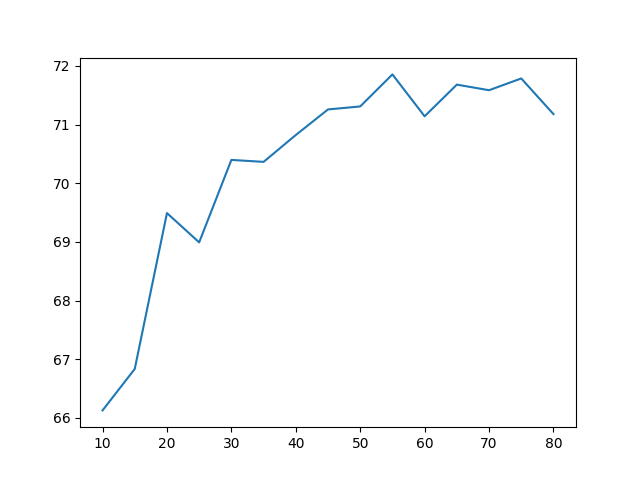

In [25]:
n_steps = []
pci_n_steps = []

for s in range(10,81,5):
    par = {'baseline_window':(-0.1,-0.01), 'response_window':(0.05,0.5), 'k':1.2, 'min_snr':1.1, 'max_var':95, 'embed':False,'n_steps':s} # 
    pci_st_result = pci_st.calc_PCIst(epochs_data_averaged, epochs.times, **par)
    print(f"{s}: {pci_st_result:.3f}")
    pci_n_steps.append(pci_st_result)
    n_steps.append(s)

plt.figure()
sns.lineplot(x=n_steps, y=pci_n_steps)
plt.show()

1.0: 77.058
1.1: 73.080
1.2: 71.309
1.3: 69.539
1.4: 67.769
1.5: 65.998
1.6: 64.401
1.7: 63.365
1.8: 62.681
1.9: 61.997
2.0: 61.313
2.1: 60.645
2.2: 59.999
2.3: 59.353
2.4: 58.707
2.5: 58.062
2.6: 57.435
2.7: 57.145
2.8: 57.099
2.9: 57.066
3.0: 57.036
3.1: 57.006
3.2: 56.975
3.3: 56.945
3.4: 56.914
3.5: 56.884
3.6: 56.854
3.7: 56.823
3.8: 56.793
3.9: 56.762
4.0: 56.732
4.1: 56.702
4.2: 56.671
4.3: 56.641
4.4: 56.610
4.5: 56.603
4.6: 56.603
4.7: 56.603
4.8: 56.603
4.9: 56.603


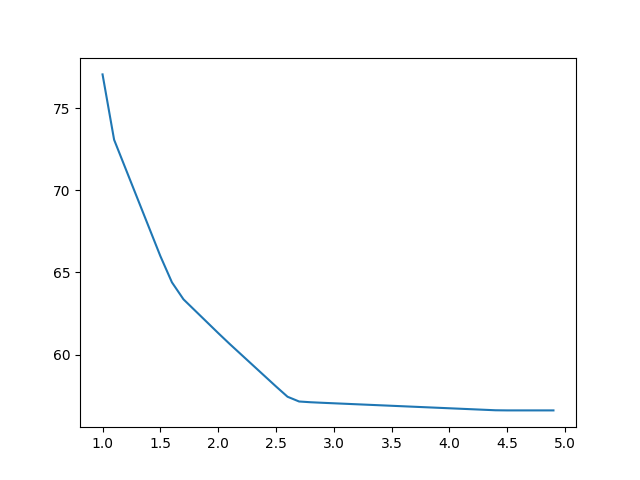

In [31]:
ks = []
pci_k = []

for k10 in range(10,50):
    k = k10/10
    par = {'baseline_window':(-0.1,-0.01), 'response_window':(0.05,0.5), 'k':k, 'min_snr':1.1, 'max_var':95, 'embed':False,'n_steps':50} # 
    pci_st_result = pci_st.calc_PCIst(epochs_data_averaged, epochs.times, **par)
    print(f"{k}: {pci_st_result:.3f}")
    pci_k.append(pci_st_result)
    ks.append(k)

plt.figure()
sns.lineplot(x=ks, y=pci_k)
plt.show()

90: 42.512
91: 42.512
92: 42.512
93: 54.339
94: 59.801
95: 71.309
96: 78.267
97: 78.267
98: 93.966
99: 103.009


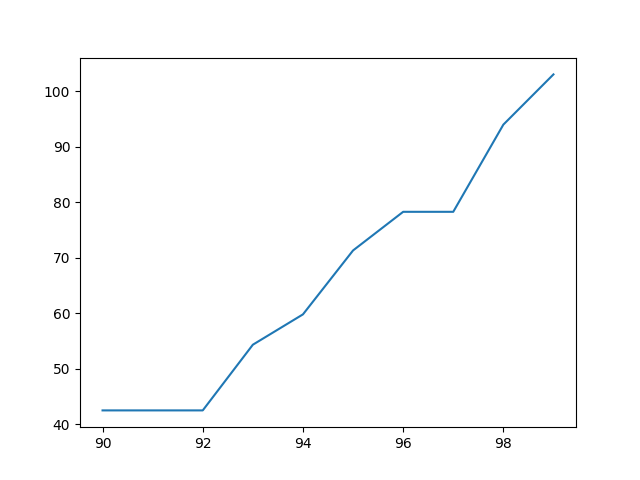

In [32]:
mvs = []
pci_mv = []

for mv in range(90,100):
    par = {'baseline_window':(-0.1,-0.01), 'response_window':(0.05,0.5), 'k':1.2, 'min_snr':1.1, 'max_var':mv, 'embed':False,'n_steps':50} # 
    pci_st_result = pci_st.calc_PCIst(epochs_data_averaged, epochs.times, **par)
    print(f"{mv}: {pci_st_result:.3f}")
    pci_mv.append(pci_st_result)
    mvs.append(mv)

plt.figure()
sns.lineplot(x=mvs, y=pci_mv)
plt.show()

In [34]:
par = {'baseline_window':(-0.1,-0.01), 'response_window':(0.05,0.5), 'k':1.2, 'min_snr':1.1, 'max_var':99, 'embed':False,'n_steps':100} # 
pci_st_result = pci_st.calc_PCIst(epochs_data_averaged, epochs.times, **par)
pci_st_result

103.15409767760613